# Importamos todas las librerias necesarias para el proyecto y el database

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import norm
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Modelos a comparar
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import  accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve,log_loss



#Cargamos el archivo .csv que es el database del proyecto y visualizamos algunas caracteristicas de él

In [43]:
df=pd.read_csv('https://raw.githubusercontent.com/isaavedrab85/PROYECTO/refs/heads/main/PROYECTO/01database.csv',sep=';')
df.head()
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   RUT          613 non-null    int64  
 1   SEXO         613 non-null    object 
 2   TIPO COL     613 non-null    int64  
 3   COMUNA       613 non-null    object 
 4   P_POND       613 non-null    float64
 5   P_PROM       613 non-null    float64
 6   P_NEM        613 non-null    int64  
 7   RK_COL       613 non-null    int64  
 8   P_LEN        613 non-null    int64  
 9   P_M1         613 non-null    int64  
 10  POND_SIN_M2  613 non-null    float64
 11  P_M2         613 non-null    int64  
 12  P_HIST       613 non-null    int64  
 13  P_CIENC      613 non-null    int64  
 14  MAX_C_H      613 non-null    int64  
 15  DIAG_MAT     613 non-null    float64
 16  AYG_24-1     613 non-null    float64
 17  C1_24-1      613 non-null    float64
 18  AL_24-2      613 non-null    float64
 19  C2_24-2 

,RUT,TIPO COL,P_POND,P_PROM,P_NEM,RK_COL,P_LEN,P_M1,POND_SIN_M2,P_M2,...,C2_24-2,AYG_24-2,C1_24-2,AP_AYG,AP_CI,AP_AL,AP_C2,AP_AYG_2,AP_CI_2,Total
count,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,...,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000
mean,307.000000,2.091354,705.314519,700.242251,749.657423,774.440457,674.528548,725.955954,683.165987,442.970636,...,3.853311,0.658418,0.514869,77487.765090,8189.233279,688.417618,67.047308,1.076672,0.079935,86433.619902
std,177.102136,0.572924,68.437849,83.492038,111.307632,128.097958,90.987580,104.960324,66.690282,80.165387,...,2.175082,1.538108,1.383147,41800.396342,3853.961746,463.518381,47.042527,3.102128,0.271414,44948.986282
min,1.000000,0.000000,503.000000,426.500000,356.000000,364.000000,375.000000,452.000000,481.600000,246.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,154.000000,2.000000,654.300000,640.500000,680.000000,685.000000,600.000000,657.000000,635.550000,393.000000,...,2.600000,0.000000,0.000000,100000.000000,10000.000000,0.000000,0.000000,0.000000,0.000000,101001.000000
50%,307.000000,2.000000,711.900000,695.500000,757.000000,782.000000,679.000000,717.000000,690.800000,437.000000,...,4.600000,0.000000,0.000000,100000.000000,10000.000000,1000.000000,100.000000,0.000000,0.000000,111100.000000
75%,460.000000,2.000000,751.550000,758.000000,837.000000,872.000000,738.000000,797.000000,729.700000,487.000000,...,5.325000,0.000000,0.000000,100000.000000,10000.000000,1000.000000,100.000000,0.000000,0.000000,111100.000000
max,613.000000,4.000000,919.050000,907.000000,1000.000000,1000.000000,935.000000,990.000000,885.950000,718.000000,...,7.000000,5.975000,6.080000,100000.000000,10000.000000,1000.000000,100.000000,10.000000,1.000000,111100.000000


#Codificamos las variables que son "objeto" o etiquetas.

In [44]:
# Codificar la variable SEXO, TIPO COLEGIO, COMUNA COLEGIO, AP_AYG, AP_CI, AP_AL, AP_C2, AP_AYG_2, AP_CI_2
le = LabelEncoder()
df['SEXO'] = le.fit_transform(df['SEXO'])
df['TIPO COL'] = le.fit_transform(df['TIPO COL'])
df['COMUNA'] = le.fit_transform(df['COMUNA'])
df['AP_AYG'] = le.fit_transform(df['AP_AYG'])
df['AP_CI'] = le.fit_transform(df['AP_CI'])
df['AP_AL'] = le.fit_transform(df['AP_AL'])
df['AP_C2'] = le.fit_transform(df['AP_C2'])
df['AP_AYG_2'] = le.fit_transform(df['AP_AYG_2'])
df['AP_CI_2'] = le.fit_transform(df['AP_CI_2'])
#df['Total'] = le.fit_transform(df['Total'])
#print(df.value_counts('Total'))

df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   RUT          613 non-null    int64  
 1   SEXO         613 non-null    int64  
 2   TIPO COL     613 non-null    int64  
 3   COMUNA       613 non-null    int64  
 4   P_POND       613 non-null    float64
 5   P_PROM       613 non-null    float64
 6   P_NEM        613 non-null    int64  
 7   RK_COL       613 non-null    int64  
 8   P_LEN        613 non-null    int64  
 9   P_M1         613 non-null    int64  
 10  POND_SIN_M2  613 non-null    float64
 11  P_M2         613 non-null    int64  
 12  P_HIST       613 non-null    int64  
 13  P_CIENC      613 non-null    int64  
 14  MAX_C_H      613 non-null    int64  
 15  DIAG_MAT     613 non-null    float64
 16  AYG_24-1     613 non-null    float64
 17  C1_24-1      613 non-null    float64
 18  AL_24-2      613 non-null    float64
 19  C2_24-2 

# Normalizamos los datos a escala común (promedio 0 y des. est. 1) y seleccionamos del dataset las variables explicativas: SEXO, TIPO COLEGIO, COMUNA COLEGIO, P. NEM, P. RANKING, P. PAES LENGUAJE, P. PAES M1, P. PAES M2, P. PAES CIENCIAS o HISTORIA y P. DIAGNOSTICO MATEMATICAS para  nuestra variable objetivo: APROBACIÓN CÁLCULO I

In [45]:
#Normalización de los Datos - StandardScaler

# Seleccionar características
features = df.columns[[1,2,3,6,7,8,9,11,14,15]]  # seleccionó las variables explicativas

# Normalizar características
scaler = StandardScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(df[features]), columns=features) #creo un dataset con las variables explicativas

# Agregar la variable objetivo APROBACIÓN CÁLCULO I codificada
df_scaled['AP_CI_en'] = le.fit_transform(df['AP_CI'])

df_scaled.head()



,SEXO,TIPO COL,COMUNA,P_NEM,RK_COL,P_LEN,P_M1,P_M2,MAX_C_H,DIAG_MAT,AP_CI_en
0,0.516264,-1.906439,0.118485,0.191901,-0.026880,0.599158,1.821641,1.498494,0.500634,1.345261,1
1,0.516264,-0.159582,0.809740,0.317781,0.301262,-0.060811,-0.285636,-0.998385,0.488022,0.429348,1
2,0.516264,-0.159582,-0.918398,0.263832,0.473146,-0.742779,-0.543086,-1.672543,-1.265124,-1.079215,1
3,-1.936992,1.587275,-2.202158,1.603558,1.762274,-0.203805,-0.199819,-0.436587,-0.470533,-0.217179,1
4,0.516264,-0.159582,0.414737,1.351797,1.113804,1.369122,1.821641,1.473526,1.307838,1.237507,1


#Contruimos las matriz de Correlación entre las variables




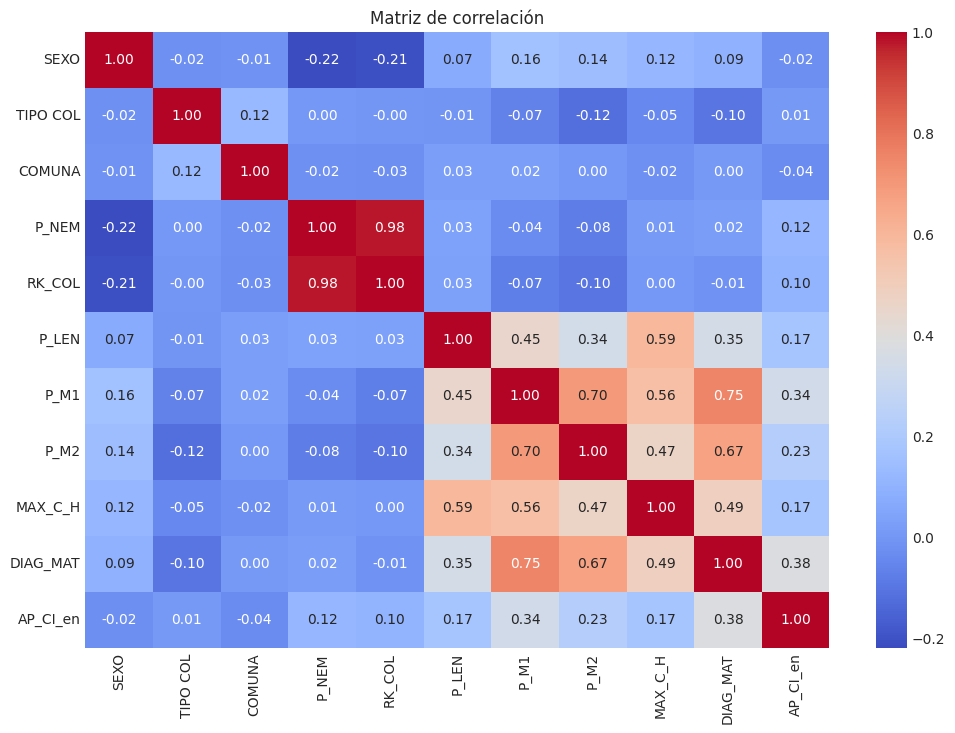

In [46]:
# Matriz de correlación
plt.figure(figsize=(12, 8))
corr = df_scaled.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación")
plt.show()

## Relación gráfica entre variables continuas explicativas y objetivo

<Figure size 8000x4000 with 0 Axes>

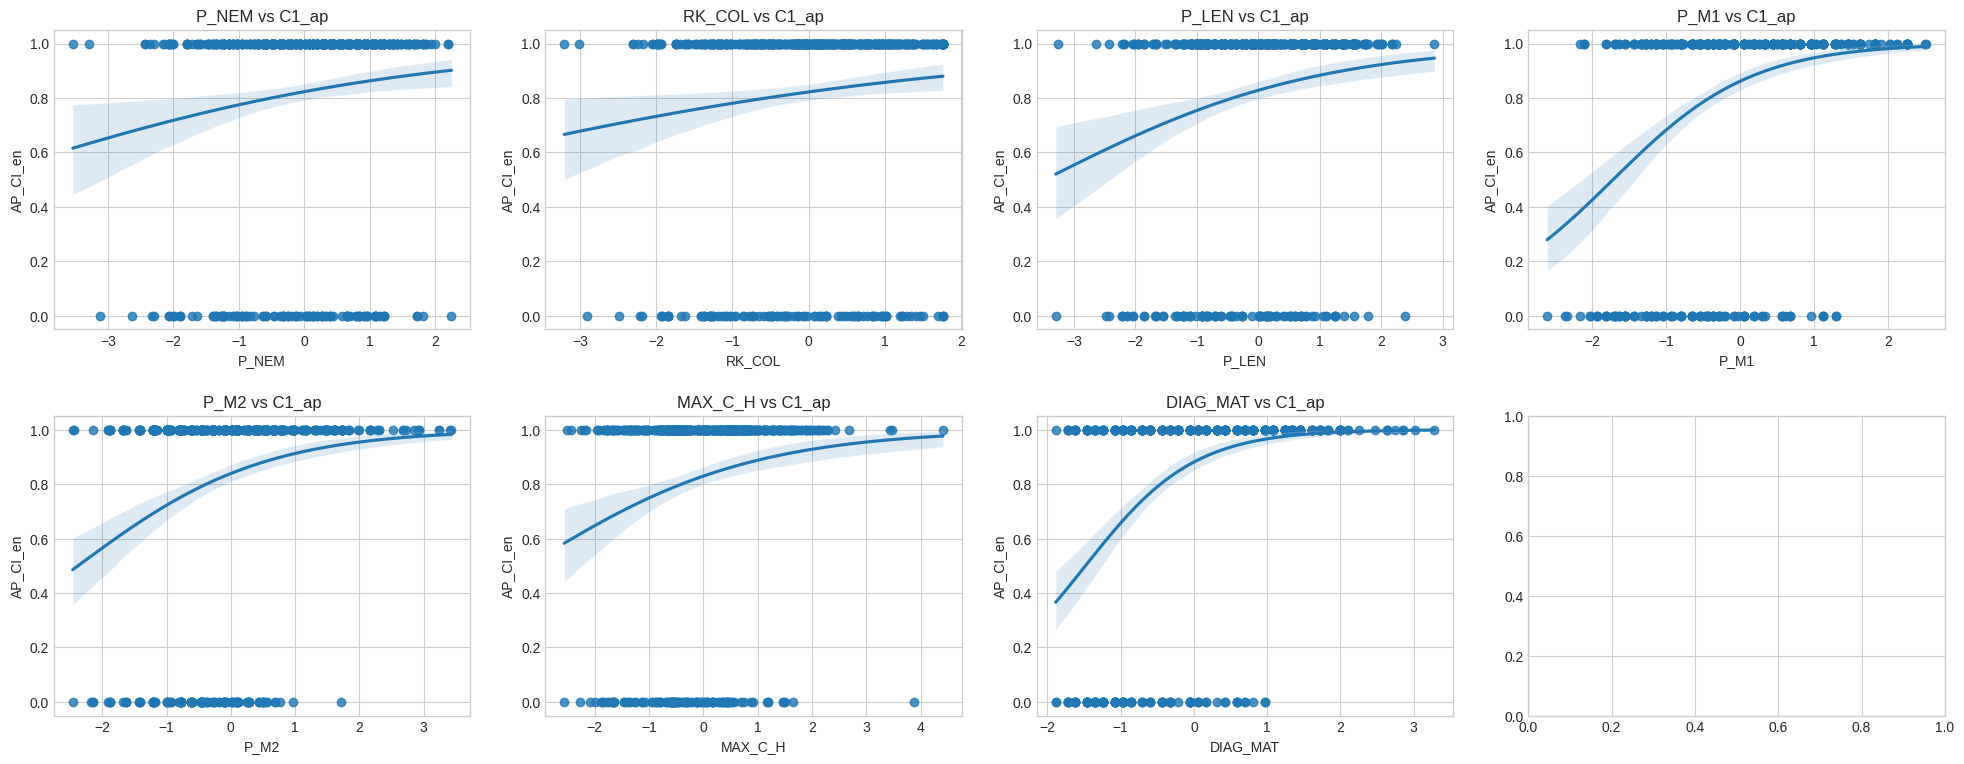

In [47]:
# Configura el estilo y el tamaño general de la figura
import seaborn as sns
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(80,40))  # Tamaño total de la figura (ancho, alto)

# Crea una cuadrícula 2x2
fig, axes = plt.subplots(2, 4, figsize=(20, 8))

# Gráfico 4: NEM vs C1_ap
sns.regplot(data=df_scaled, x="P_NEM", y="AP_CI_en", logistic=True, ax=axes[0, 0])
axes[0,0].set_title('P_NEM vs C1_ap')

# Gráfico 5: RK_COL vs C1_ap
sns.regplot(data=df_scaled, x="RK_COL", y="AP_CI_en", logistic=True, ax=axes[0, 1])
axes[0,1].set_title('RK_COL vs C1_ap')

# Gráfico 6: P_LEN vs C1_ap
sns.regplot(data=df_scaled, x="P_LEN", y="AP_CI_en", logistic=True, ax=axes[0,2])
axes[0,2].set_title('P_LEN vs C1_ap')

# Gráfico 7: P_M1 vs C1_ap
sns.regplot(data=df_scaled, x="P_M1", y="AP_CI_en", logistic=True, ax=axes[0, 3])
axes[0,3].set_title('P_M1 vs C1_ap')

# Gráfico 8: P_M2 vs C1_ap
sns.regplot(data=df_scaled, x="P_M2", y="AP_CI_en", logistic=True, ax=axes[1, 0])
axes[1,0].set_title('P_M2 vs C1_ap')

# Gráfico 9: MAX_C_H vs C1_ap
sns.regplot(data=df_scaled, x="MAX_C_H", y="AP_CI_en", logistic=True, ax=axes[1,1 ])
axes[1,1].set_title('MAX_C_H vs C1_ap')


# Gráfico 10: DIAG_MAT vs C1_ap
sns.regplot(data=df_scaled, x="DIAG_MAT", y="AP_CI_en", logistic=True, ax=axes[1, 2])
axes[1, 2].set_title('DIAG_MAT vs C1_ap')

# Ajusta el espacio entre subplots
plt.tight_layout(pad=2.0)

# Muestra la figura
plt.show()


#Separación del dataset en variables explicativas - variable objetivo y separación en datos de entrenamiento y testeo

In [48]:
X = df_scaled.drop(columns=["AP_CI_en"])
y = df_scaled["AP_CI_en"]

#  Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#Entrenamiento de Modelos

## Modelo de red neuronal de 3 capas ocultas y algunas métricas

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


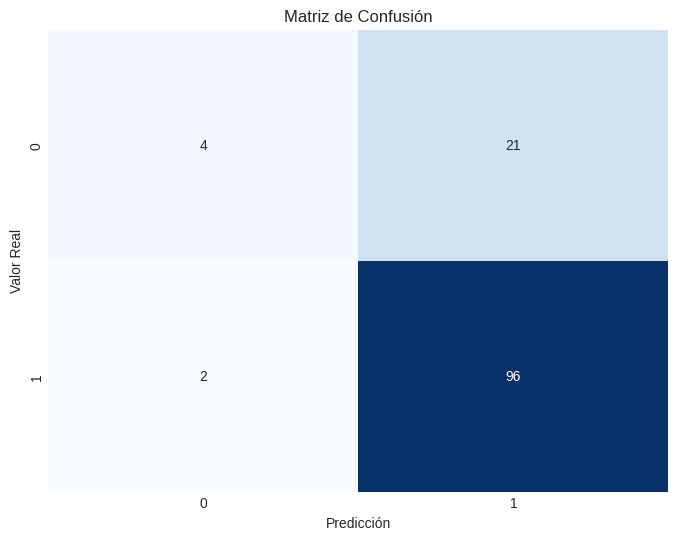

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

Precisión: 0.8130
Accuracy: 0.8130
F1 score: 0.8930
Recall: 0.9796
ROC-AUC: 0.5698
Log Loss: 6.7399


In [49]:
#  Construir el modelo neuronal
model_neuronal = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),  # Capa oculta 1
    Dense(8, activation='relu'),                                   # Capa oculta 2
    Dense(4, activation='relu'),                                   # Capa oculta 3
    Dense(1, activation='sigmoid')                                 # Capa de salida (binaria)
])

# 5. Compilar el modelo
model_neuronal.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# 6. Entrenar la red
history = model_neuronal.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32,
    verbose=0
)



#matriz de confusión del modelo
y_pred = model_neuronal.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, y_pred_binary)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()


# 7. Evaluar el modelo
test_loss, test_acc = model_neuronal.evaluate(X_test, y_test, verbose=0)
y_pred = model_neuronal.predict(X_test)
y_pred_neuronal_by = (y_pred > 0.5).astype(int)
print(f"\nPrecisión: {test_acc:.4f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_neuronal_by):.4f}")
print(f"F1 score: {f1_score(y_test, y_pred_neuronal_by):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_neuronal_by):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_neuronal_by):.4f}")
print(f"Log Loss: {log_loss(y_test, y_pred_neuronal_by):.4f}")



##Entrenamiento de los modelos: Regresión Logística - Random Forest - SVM - KNN - Naive Bayes - XGBoost y algunas métricas

<Figure size 1400x800 with 0 Axes>

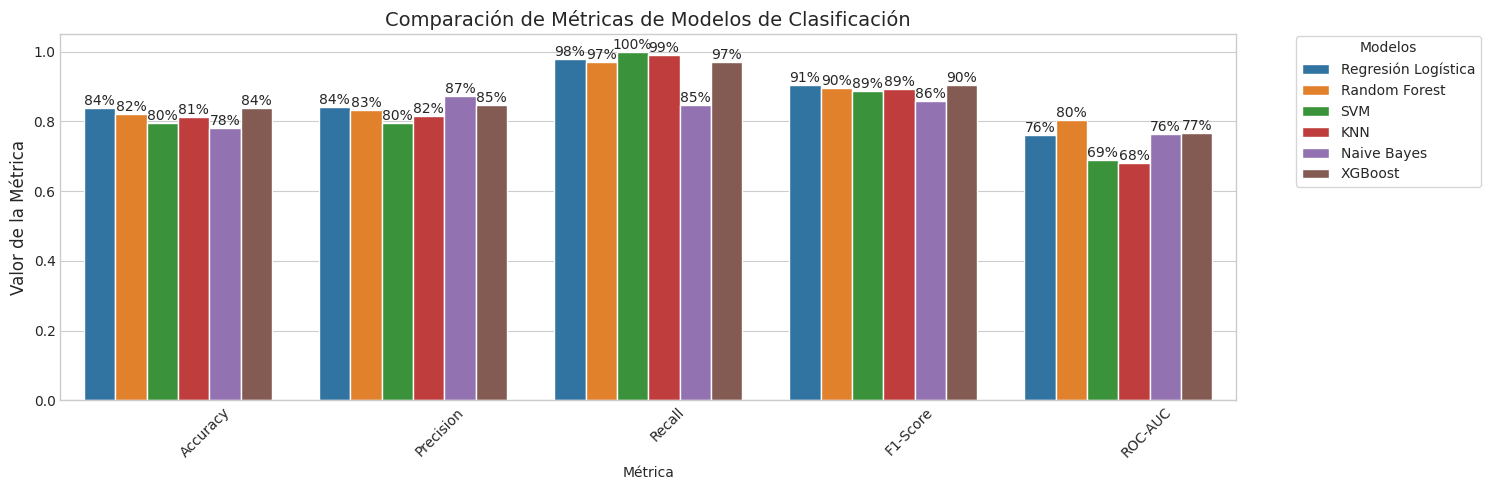

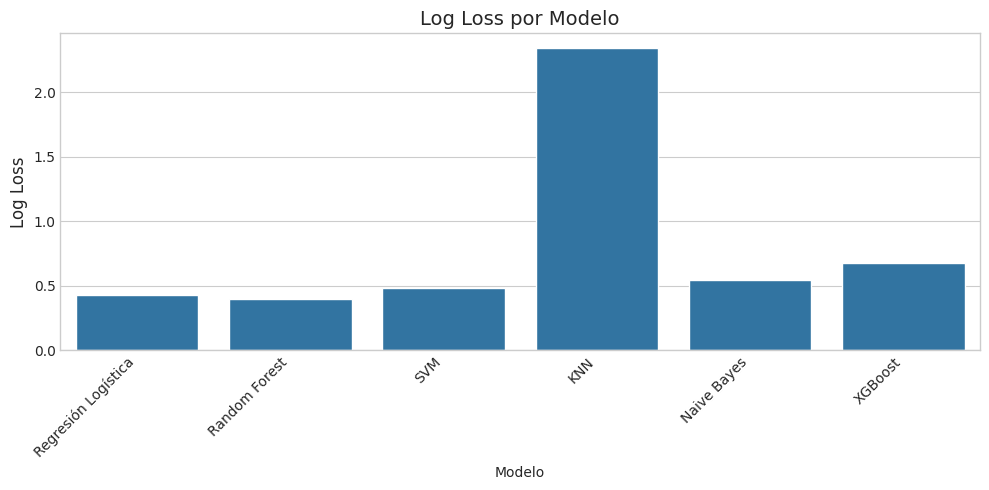

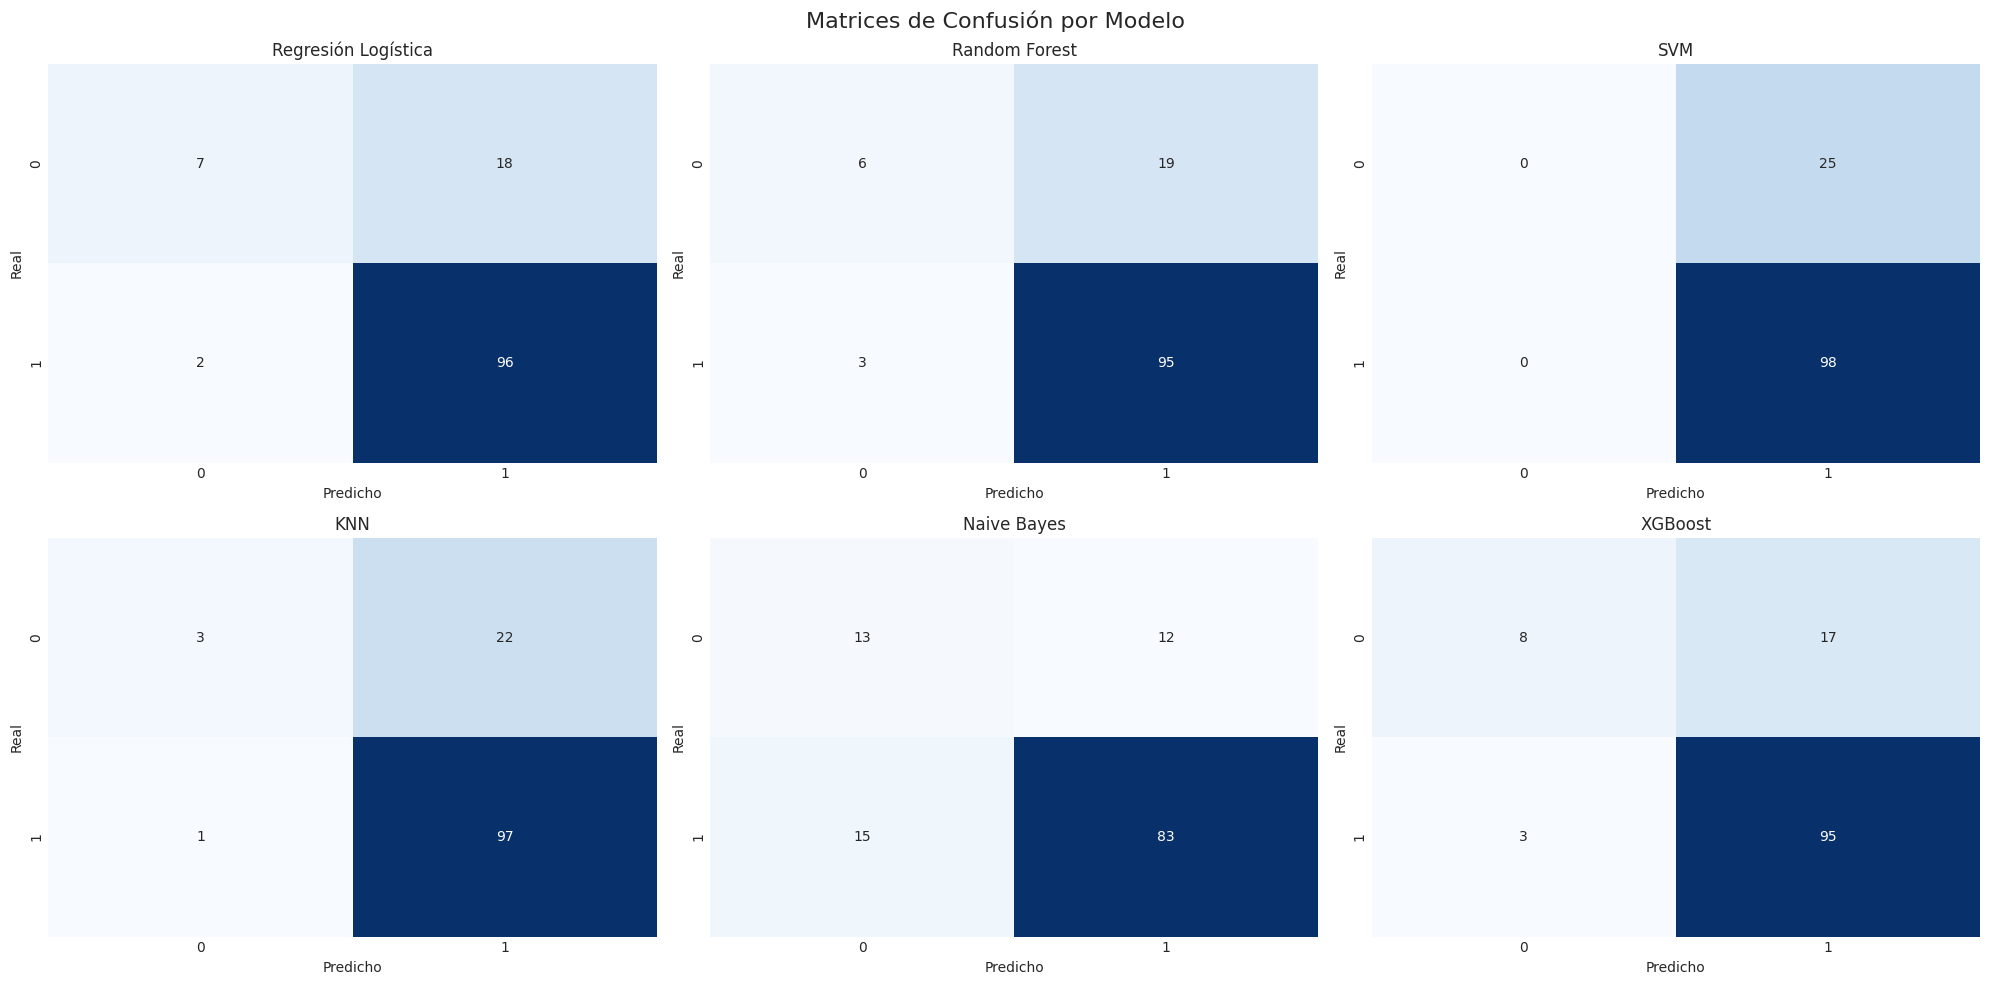

In [50]:
#Modelos
metrics = ["Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC", "Log Loss"]
models = {
    "Regresión Logística": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC(kernel='linear', probability=True),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(),
    #"Red Neuronal": model_neuronal  # Agrega el modelo de
    # Note: The Neural Network model was trained and added to
    # this dictionary in the cell before this one.
    # Let's assume 'Red Neuronal' model is already in the 'models' dictionary
    # from the previous cell execution. If not, you might need to re-add it
    # or ensure that the execution flow adds it to the dictionary before this cell.
}

# 4. Entrenar y evaluar modelos
results = {}
conf_matrices = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    conf_matrices[name] = confusion_matrix(y_test, y_pred)



for name, model in models.items():
    y_pred = model.predict(X_test)
    # For models that do not support predict_proba (like SVC by default if probability=False),
    # this will cause an error. Ensure models support predict_proba or handle it.
    # In this case, SVC is initialized with probability=True, so it should work.
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    # Store the metrics in a dictionary
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_pred_proba),
        "Log Loss": log_loss(y_test, y_pred_proba)
    }


# Preparar datos para seaborn
plot_data = []
# Iterate through the results dictionary to build the plot_data list
for model_name, model_metrics in results.items():
    for metric, value in model_metrics.items():
        # Exclude Log Loss for the initial plot if the scale is too different
        if metric != "Log Loss":
             plot_data.append({"Modelo": model_name, "Métrica": metric, "Valor": value})


# DataFrame para seaborn
df_plot = pd.DataFrame(plot_data)

# Define a color palette
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")
palette = None#sns.color_palette("colorblind", len(models))


# Gráfico de barras agrupadas
plt.figure(figsize=(15, 5)) # Adjust figure size as needed
ax = sns.barplot(x="Métrica", y="Valor", hue="Modelo", data=df_plot, palette=palette)
ax.set_title("Comparación de Métricas de Modelos de Clasificación", fontsize=14)
ax.set_ylabel("Valor de la Métrica", fontsize=12)
plt.xticks(rotation=45, ha='left')
plt.legend(
    bbox_to_anchor=(1.05, 1),  # Posición (x, y) relativa al eje
    loc='upper left',          # Punto de anclaje de la leyenda
    borderaxespad=0.1,         # Espacio entre leyenda y gráfico
    frameon=True,              # Borde visible
    title="Modelos"            # Título opcional
)
#valor = %.3f*100
for container in ax.containers:
    ax.bar_label(container, fmt=lambda x: f"{x*100:.0f}%", label_type='edge')
plt.tight_layout()
plt.show()

# Optional: Plot Log Loss separately if its scale is different
log_loss_data = []
for model_name, model_metrics in results.items():
    log_loss_data.append({"Modelo": model_name, "Métrica": "Log Loss", "Valor": model_metrics["Log Loss"]})

df_log_loss = pd.DataFrame(log_loss_data)

plt.figure(figsize=(10, 5))
ax_log_loss = sns.barplot(x="Modelo", y="Valor", data=df_log_loss, palette=palette)
ax_log_loss.set_title("Log Loss por Modelo", fontsize=14)
ax_log_loss.set_ylabel("Log Loss", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()




# 6. Matrices de confusión combinadas
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
#fig.delaxes(axes[1, 3])  # Eliminar el último subplot vacío
#fig.delaxes(axes[1,2])
for (name, matrix), ax in zip(conf_matrices.items(), axes.ravel()[:len(models)]):
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', ax=ax, cbar=False)
    ax.set_title(name)
    ax.set_xlabel("Predicho")
    ax.set_ylabel("Real")

plt.suptitle("Matrices de Confusión por Modelo", fontsize=16)
plt.tight_layout()
plt.show()

#Conclusión Modelos:
En este punto decido **usar el Modelo Logístico**. Junto con el modelo Random Forest tienen las mejores métricas y muy parecidas. Sin embargo, en este punto, dada las caraterísticas (enfoque parámetrico) del modelo Logístico, es que me inclino por él. Esto me permite hacer algunas pruebas estadísticas como el p-value, lo cual me ayuda a reducir el número de variables explicativas y quedarme con las que tienen mayor significancia para mi variable objetivo.

#Analisis - mejoramiento - Validación del **MODELO LOGÍSTICO**

##Analisis de metricas y valores estadisticos para decidir variables más explicativas para el modelo de Regresión Logístico


###Análisis de P-Values

In [51]:
## P-values

# agregar una constante (intercepto)
X = sm.add_constant(X_train)  # X_train: tus variables independientes
y = y_train  # Variable objetivo

# Ajustar el modelo logístico
modelo_sm = sm.Logit(y, X).fit(disp=0)  # disp=0 para no mostrar mensajes

# Resumen completo con p-values
print(modelo_sm.summary())
#print(modelo_sm.pvalues)

                           Logit Regression Results                           
Dep. Variable:               AP_CI_en   No. Observations:                  490
Model:                          Logit   Df Residuals:                      479
Method:                           MLE   Df Model:                           10
Date:                Fri, 06 Jun 2025   Pseudo R-squ.:                  0.2138
Time:                        20:45:39   Log-Likelihood:                -178.96
converged:                       True   LL-Null:                       -227.61
Covariance Type:            nonrobust   LLR p-value:                 1.881e-16
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1264      0.184     11.578      0.000       1.766       2.486
SEXO          -0.0076      0.139     -0.054      0.957      -0.281       0.266
TIPO COL       0.0196      0.145      0.135      0.8

### Análisis de VIF para ver la Multicolinealidad

In [52]:
#Analiza multicolinealidad
from statsmodels.stats.outliers_influence import variance_inflation_factor
# DataFrame con variables predictoras (X_train)
vif_data = pd.DataFrame()
vif_data["Variable"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

#print(vif_data)  # Valores >5-10 indican problemas

### Resumen:
Contiene los **coeficientes**, **Odds Ratio (ranking)**, **P-value** y **VIF** para las variables explicativas que en el modelo de Regresión logística son más significativas (p<0.05)

In [53]:
logistic_model = models["Regresión Logística"]
# Crear DataFrame con resultados

resultados = pd.DataFrame({
    'Variable': X_train.columns,
    'Coeficiente': logistic_model.coef_[0],
    'Odds_Ratio': np.exp(logistic_model.coef_[0]),
    'P_value': modelo_sm.pvalues[1:],
    'VIF': [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
})

# Filtrar variables significativas (p < 0.05)
print(resultados[resultados['P_value'] < 0.05].sort_values('P_value'))


          Variable  Coeficiente  Odds_Ratio   P_value       VIF
DIAG_MAT  DIAG_MAT     0.993101    2.699594  0.000025  2.591343
P_M1          P_M1     0.653156    1.921596  0.006413  3.116168
MAX_C_H    MAX_C_H    -0.458738    0.632081  0.011243  1.891279


###Conclusión: Esto último nos indica que el modelo de regresión logística podría ser utilizado solo con las tres variables explicativas más significativas, las cuales son, en orden de importancia: DIAG_MAT (Diagnóstico Matemáticas), P_M1 (Puntjae Paes M1) y MAX_C_H (Puntaje máximo(Ciencias, historia)).

# Entrenamos y veirificamos las métricas para el Modelo Logístico sólo considerando las variables más significativas

## Eliminamos variables poco significativas y dividimos el dataset para entrenamiento y prueba

In [54]:
#Definimos las variables significativas y objetivo
Z = df_scaled.drop(columns=["AP_CI_en","SEXO","TIPO COL","COMUNA","P_NEM","RK_COL","P_LEN", "P_M2"])
w = df_scaled["AP_CI_en"]


In [55]:
Z = sm.add_constant(Z)
#print(Z.head())
#print(w.head())
#  Dividir datos
Z_train, Z_test, w_train, w_test = train_test_split(Z, w, test_size=0.2, random_state=42)

## Entrenamos al modelo y calculamos métricas

In [56]:
modelo = sm.Logit(w_train, Z_train).fit()
#print(modelo.summary())  # Muestra coeficientes, p-values, etc.

# Predecir probabilidades y clases
w_pred_prob = modelo.predict(Z_test)
w_pred = (w_pred_prob > 0.5).astype(int)
#modelo.predict(Z_test.drop(columns=['const']))  # Clases predichas (0 o 1)

# Calcular métricas
metricas = {
    'Exactitud (Accuracy)': accuracy_score(w_test, w_pred),
    'Precisión (Precision)': precision_score(w_test, w_pred),
    'Sensibilidad (Recall)': recall_score(w_test, w_pred),
    'F1-Score': f1_score(w_test, w_pred),
    'AUC-ROC': roc_auc_score(w_test, w_pred_prob),
    'Matriz de Confusión': confusion_matrix(w_test, w_pred)
}

# Crear DataFrame con métricas
df_metricas = pd.DataFrame(list(metricas.items())[:-1], columns=['Métrica', 'Valor'])  # Excluir matriz de confusión
df_metricas = df_metricas.sort_values(by='Valor', ascending=False).reset_index(drop=True)

# Mostrar tabla
print("\n📊 Métricas del Modelo (Ordenadas por Valor):")
print(df_metricas)

# Mostrar matriz de confusión por separado
print("\n🔍 Matriz de Confusión:")
print(metricas['Matriz de Confusión'])


Optimization terminated successfully.
         Current function value: 0.374087
         Iterations 7

📊 Métricas del Modelo (Ordenadas por Valor):
                 Métrica     Valor
0  Sensibilidad (Recall)  0.989796
1               F1-Score  0.894009
2  Precisión (Precision)  0.815126
3   Exactitud (Accuracy)  0.813008
4                AUC-ROC  0.757143

🔍 Matriz de Confusión:
[[ 3 22]
 [ 1 97]]


**Conclusión General:** Si bien el modelo Logístico con sólo 3 variables tiene un desempeño levemente inferior en Precision y Accurancy, esta diferencia es de cerca de un 2%, lo cual no es muy significativo si consideramos el uso de **sólo 3** variables y **no 10 **como se usó en los primeros entrenamientos.
En este sentido creo que mientras más simple es el modelo, teniendo métricas aceptables es mejor.